In [46]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
from nltk.corpus import stopwords
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from textblob import Word, TextBlob
import Stemmer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import tensorflow as tf
from wordcloud import WordCloud

In [47]:
# Importing dataset
train = pd.read_csv('train.csv')

In [48]:
# Inspecting dataset
train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,..."
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...


In [49]:
# Information regarding the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      426340 non-null  int64 
 1   ProductId               426340 non-null  object
 2   UserId                  426340 non-null  object
 3   ProfileName             426326 non-null  object
 4   HelpfulnessNumerator    426340 non-null  int64 
 5   HelpfulnessDenominator  426340 non-null  int64 
 6   Score                   426340 non-null  int64 
 7   Time                    426340 non-null  int64 
 8   Summary                 426320 non-null  object
 9   Text                    426340 non-null  object
dtypes: int64(5), object(5)
memory usage: 32.5+ MB


In [50]:
# Statistics of the dataset
train.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,426340.000000,426340.000000,426340.000000,426340.000000,4.263400e+05
mean,284300.799618,1.733159,2.220244,4.183455,1.296222e+09
std,164012.600602,7.328184,8.014894,1.310577,4.808061e+07
min,1.000000,0.000000,0.000000,1.000000,9.408096e+08
25%,142363.750000,0.000000,0.000000,4.000000,1.271203e+09
50%,284308.500000,0.000000,1.000000,5.000000,1.311034e+09
75%,426183.250000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,844.000000,923.000000,5.000000,1.351210e+09


In [51]:
# Replacing null values with blank space for Summary and Text columns
train.Summary.fillna('', inplace=True)
train.Text.fillna('', inplace=True)

In [52]:
# Inspecting dataset
train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,..."
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...


In [53]:
# Creating new field called summary text which combines summary and text into one field
train['summary_text'] = train['Summary'] + ' ' + train['Text']

In [54]:
# Inspecting the dataset after adding new field
train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,summary_text
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,Very Good I received this product early from t...
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...,"Organic, Kosher, Tasty Assortment of Premium T..."
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,...","excellent gluten-free spaghetti: great taste, ..."
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...,Lindt is Lindt Buying this multi-pack I was mi...
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...,YUM!!!!! These bars are so good! I loved them ...


In [55]:
# Inspecting the first row of the dataset
train.loc[0]

Id                                                                   220291
ProductId                                                        B0034EDLS2
UserId                                                        AVF82BC7S0IO7
ProfileName                                                          Kbrown
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     5
Time                                                             1332806400
Summary                                                           Very Good
Text                      I received this product early from the seller!...
summary_text              Very Good I received this product early from t...
Name: 0, dtype: object

In [56]:
# Inspecting the 2nd row of the dataset
train.loc[1]

Id                                                                   225833
ProductId                                                        B001I7HJE4
UserId                                                       A1YUL9PCJR3JTY
ProfileName                                 O. Brown "Ms. O. Khannah-Brown"
HelpfulnessNumerator                                                      1
HelpfulnessDenominator                                                    1
Score                                                                     5
Time                                                             1190160000
Summary                   Organic, Kosher, Tasty Assortment of Premium T...
Text                      *****<br />Numi's Collection Assortment Melang...
summary_text              Organic, Kosher, Tasty Assortment of Premium T...
Name: 1, dtype: object

In [57]:
# Inspecting the text column in the 2nd row of the dataset
train.loc[1,'Text']

'*****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer writes: "From mist-covered mountains to sun-drenched deserts

In [58]:
# Inspecting the summary text column of the 2nd row in the dataset
train.loc[1,'summary_text']

'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans *****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer 

# Step 1

In [59]:
# Checking for duplicate values of the Text column
duplicate = train[train.duplicated('Text')]

In [60]:
# Printing dataframe having duplicate values
duplicate['Text'].count()

118091

In [61]:
# Dropping duplicate values based on UserId, Profile Name, Time and Text columns
train = train.drop_duplicates(subset = {'UserId','ProfileName','Time','Text'}, keep='first')

In [62]:
# Review count after dropping duplicates
train['summary_text'].count()

308478

In [66]:
# Adding a new field called type which is based on the score given to a review
train['Type'] = np.where(train.loc[:,'Score'] == 3, "Neutral", np.where(train.loc[:,'Score'] > 3, "Positive", "Negative"))

In [67]:
# Counting values of each type
train['Type'].value_counts()

Positive    240558
Negative     44669
Neutral      23251
Name: Type, dtype: int64

Text(0.5, 1.0, 'Bar graph representing the no of reviews belonging to each type')

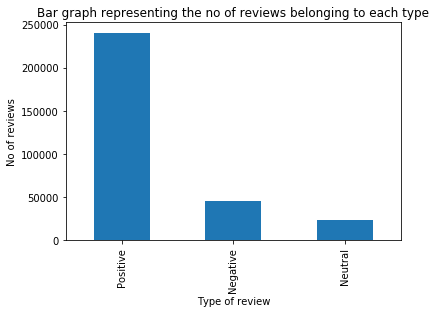

In [68]:
# Plotting the type column as a bar chart

train['Type'].value_counts().plot(kind='bar')
plt.xlabel("Type of review")
plt.ylabel("No of reviews")
plt.title("Bar graph representing the no of reviews belonging to each type")

Text(0.5, 1.0, 'Pie chart representing percentage of reviews belonging to each score')

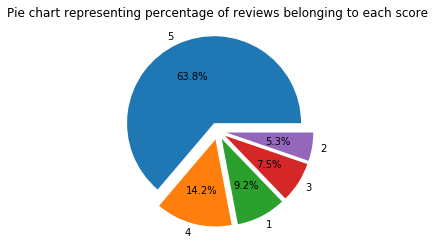

In [69]:
# Plotting the score column as a pie chart
fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
labels = '5','4','1','3','2'
ax.pie(train["Score"].value_counts(),explode=explode,autopct='%1.1f%%', labels = labels)
plt.title("Pie chart representing percentage of reviews belonging to each score")

In [71]:
# Adding a new column called Helpfulness Ratio
train['Helpfulness Ratio'] = round(train.loc[:,'HelpfulnessNumerator'] / train.loc[:,'HelpfulnessDenominator'],2)

In [72]:
# Inspecting dataset
train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,summary_text,Type,Helpfulness Ratio
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,Very Good I received this product early from t...,Positive,NaN
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...,"Organic, Kosher, Tasty Assortment of Premium T...",Positive,1.0
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,...","excellent gluten-free spaghetti: great taste, ...",Positive,NaN
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...,Lindt is Lindt Buying this multi-pack I was mi...,Positive,NaN
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...,YUM!!!!! These bars are so good! I loved them ...,Positive,NaN


Text(0.5, 1.0, 'Top 10 helpfulness ratios based on count of reviews')

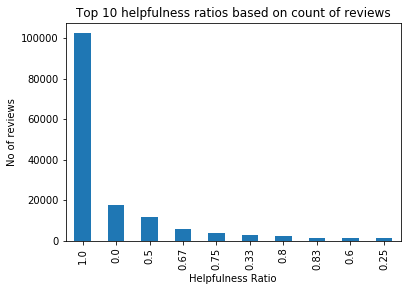

In [73]:
# Plotting the top 10 ratios based on the amount of reviews
train["Helpfulness Ratio"].value_counts().nlargest(10).plot(kind="bar")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("No of reviews")
plt.title("Top 10 helpfulness ratios based on count of reviews")

In [74]:
# Adding a new column called type of review based on helpfulness ratio
train['Type of Review'] = np.where(train.loc[:,'Helpfulness Ratio'] > 0.6, "Top review", np.where((train.loc[:,'Helpfulness Ratio'] > 0.4) & (train.loc[:,'Helpfulness Ratio'] <= 0.6), "Average Review", np.where(train.loc[:,'Helpfulness Ratio'] <=  0.4, "Bad review","x")))

In [75]:
# Inspecting dataset
train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,summary_text,Type,Helpfulness Ratio,Type of Review
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,Very Good I received this product early from t...,Positive,NaN,x
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...,"Organic, Kosher, Tasty Assortment of Premium T...",Positive,1.0,Top review
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,...","excellent gluten-free spaghetti: great taste, ...",Positive,NaN,x
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...,Lindt is Lindt Buying this multi-pack I was mi...,Positive,NaN,x
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...,YUM!!!!! These bars are so good! I loved them ...,Positive,NaN,x


In [78]:
# Counting the totals of type of review
train["Type of Review"].value_counts()

x                 144946
Top review        123922
Bad review         25539
Average Review     14071
Name: Type of Review, dtype: int64

Text(0.5, 1.0, 'Plot of type of reviews based on no of reviews')

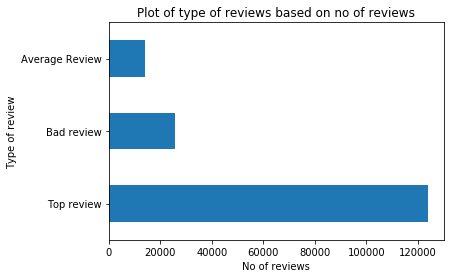

In [79]:
# Plotting the type of reviews
type_of_review = train['Type of Review'].value_counts()
type_of_review.drop(labels=['x'],axis=0, inplace=True)
type_of_review.plot(kind='barh')
plt.ylabel("Type of review")
plt.xlabel("No of reviews")
plt.title("Plot of type of reviews based on no of reviews")

# Step 2

In [80]:
# Copying training dataframe to new variable
reviews = train.copy()

In [81]:
# Verifying if dataframe is copied by viewing first entry in the summary text
reviews['summary_text'][0]

'Very Good I received this product early from the seller! They are a very tastey & a Great mid-day snack. I have shared them with my Glutten Free Friends & they will be ordering this product & more very soon.'

# Lower Case

In [83]:
# Applying lower case function to each word in summary text
reviews['summary_text'] = reviews['summary_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [84]:
# Viewing first 5 summary texts after converting to lower case
reviews['summary_text'][1]

'organic, kosher, tasty assortment of premium teas & teasans *****<br />numi\'s collection assortment melange includes:<br />5 herbal teas (caffeine-free, also called "teasans"):<br />* dry desert lime: lime herbal teasan<br />* fields of gold: lemongrass herbal teasan<br />* red mellow bush: rooibos herbal teasan<br />* bushmen\'s brew: honeybush herbal teasan<br />* simply mint: moroccan mint<br /><br />2 green teas (lower in caffeine):<br />* temple of heaven: gunpowder green tea<br />* monkey king: jasmine green tea<br /><br />2 black teas (contain caffeine):<br />* chinese breakfast: yunnan black tea<br />* smoky tarry: lapsang souchong black tea<br /><br />this is a total of nine different teas, two tea bags of each one in each box. numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas i have ever tried. they do not include artificial ingredients or flavorings.<br /><br />on the box, the manufacturer 

# Punctuation Removal

In [85]:
# Copying training dataframe to new variable
reviews = train.copy()

In [86]:
# Verifying if dataframe is copied by viewing first 5 entries
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,summary_text,Type,Helpfulness Ratio,Type of Review
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,Very Good I received this product early from t...,Positive,NaN,x
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...,"Organic, Kosher, Tasty Assortment of Premium T...",Positive,1.0,Top review
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,...","excellent gluten-free spaghetti: great taste, ...",Positive,NaN,x
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...,Lindt is Lindt Buying this multi-pack I was mi...,Positive,NaN,x
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...,YUM!!!!! These bars are so good! I loved them ...,Positive,NaN,x


In [87]:
# Removing punctuations

reviews['summary_text'] = reviews['summary_text'].apply(lambda x: (x.translate(str.maketrans('', '', string.punctuation))))


In [88]:
# Viewing first 5 entries of summary text after removing punctuation
reviews['summary_text'][1]

'Organic Kosher Tasty Assortment of Premium Teas  Teasans br Numis Collection Assortment Melange includesbr 5 Herbal Teas caffeinefree also called teasansbr  Dry Desert Lime Lime Herbal Teasanbr  Fields of Gold Lemongrass Herbal Teasanbr  Red Mellow Bush Rooibos Herbal Teasanbr  Bushmens Brew Honeybush Herbal Teasanbr  Simply Mint Moroccan Mintbr br 2 Green Teas lower in caffeinebr  Temple of Heaven Gunpowder Green Teabr  Monkey King Jasmine Green Teabr br 2 Black Teas contain caffeinebr  Chinese Breakfast Yunnan Black Teabr  Smoky Tarry Lapsang Souchong Black Teabr br This is a total of nine different teas two tea bags of each one in each box Numi teas are known for their highquality organic and kosher ingredients and in my opinion are some of the tastiest and best teas I have ever tried They do not include artificial ingredients or flavoringsbr br On the box the manufacturer writes From mistcovered mountains to sundrenched deserts to fertile fields we proudly bring you our tea palett

# Removing HTML tags

In [89]:
# Copying training dataframe to new variable
reviews = train.copy()

In [90]:
# Removing br tags from each entry in summary text
reviews['summary_text'] = reviews['summary_text'].str.replace('<br />','')

# Stemming

In [91]:
# Copying training dataframe to new variable
reviews = train.copy()

In [92]:
# Setting the stemmer language
stemmer = Stemmer.Stemmer('english')

In [93]:
# Using stemmer to stem a sample word
print(stemmer.stemWord('complaining'))

complain


In [94]:
# Applying stemming on the summary text column
stemmer = reviews['summary_text'].apply(lambda x: " ".join([stemmer.stemWord(word) for word in x.split()]))

In [95]:
# Viewing the first entry after stemming
stemmer[0]

'Veri Good I receiv this product earli from the seller! They are a veri tastey & a Great mid-day snack. I have share them with my Glutten Free Friend & they will be order this product & more veri soon.'

# Lemmatization

In [96]:
# Copying training dataframe to new variable
reviews = train.copy()

In [97]:
# Performing lemmatization on blank text. This helps in speeding up the lemmatization process
Word("").lemmatize()

''

In [98]:
# Applying lemmatization on the summary text column
lemma = reviews['summary_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [99]:
# Viewing the second entry after lemmatization
lemma[1]

'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans *****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bag of each one in each box. Numi tea are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best tea I have ever tried. They do not include artificial ingredient or flavorings.<br /><br />On the box, the manufacturer writ

# Spelling Correction

In [100]:
# Copying training dataframe to new variable
reviews = train.copy()

In [101]:
# Applying spelling correction on the first 20 entries of summary text column

spell_corr = reviews['summary_text'][:20].apply(lambda x: str(TextBlob(x).correct()))

In [102]:
# Viewing first entry after performing spelling correction
spell_corr[1]

'Organic, Other, Nasty Assortment of Premium Seas & Peasants *****<br />Sum\'s Collection Assortment Melange includes:<br />5 Verbal Seas (caffein-free, also called "peasants"):<br />* Cry Desert Time: Time Verbal Reason<br />* Fields of Old: Lemongrass Verbal Reason<br />* Red Fellow Rush: Rooibos Verbal Reason<br />* Bushmen\'s Grew: Honeybush Verbal Reason<br />* Simply Lint: Moroccan Lint<br /><br />2 Green Seas (lower in caffein):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Famine Green Tea<br /><br />2 Black Seas (contain caffein):<br />* Chinese Breakfast: Duncan Black Tea<br />* Smoke Carry: Lapsing Touching Black Tea<br /><br />His is a total of nine different tears, two tea bags of each one in each box. Sum tears are known for their high-quality, organic and kocher ingredient, and in my opinion, are some of the tastes and best tears I have ever tried. They do not include artificial ingredient or favoring.<br /><br />In the box, the manufacturer writes: "F

# Step 3 - Feature Representation

## Count Vectorizer

In [103]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
# Initializing CountVectorizer
vect = CountVectorizer()

In [105]:
# Storing copy of dataset
reviews = train.copy()

In [106]:
# Fitting the vectorizer
vect = CountVectorizer().fit(reviews['summary_text'])

In [107]:
# Getting the length of the vocabulary
feature_names = vect.get_feature_names()
len(feature_names)

111201

In [108]:
# Transforming text into vector
r = vect.transform(reviews['summary_text'])

In [109]:
# Shape of the vector
r.shape

(308478, 111201)

#  Term Frequency

In [110]:
# Copying the dataset
reviews = train.copy()

In [111]:
# Removing br tags from each entry in summary text
reviews['summary_text'] = reviews['summary_text'].str.replace('<br />','')

In [112]:
# Removing punctuations
exclude = set(string.punctuation)
reviews['summary_text'] = reviews['summary_text'].apply(lambda x: (x.translate(str.maketrans('', '', string.punctuation))))

In [113]:
# Creating term frequencies
tf1 = (reviews['summary_text'][0:20]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

In [114]:
# Viewing term frequencies
tf1

,words,tf
0,,36.0
1,I,52.0
2,a,45.0
3,product,11.0
4,this,20.0
...,...,...
696,cakeOn,1.0
697,since,1.0
698,touch,1.0
699,poorly,1.0


# Inverse Document Frequency

In [115]:
# Calculating IDF
for i, word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(reviews.shape[0]/(len(reviews[reviews['summary_text'].str.contains(word)][0:20])))

In [116]:
# Viewing TFs and IDFs
tf1.head(25)

,words,tf,idf
0,,36.0,9.643674
1,I,52.0,9.643674
2,a,45.0,9.643674
3,product,11.0,9.643674
4,this,20.0,9.643674
5,very,8.0,9.643674
6,Friends,1.0,9.643674
7,they,7.0,9.643674
8,from,9.0,9.643674
9,more,7.0,9.643674


# Tf-Idf

In [117]:
# Copying the dataset
reviews = train.copy()

In [118]:
# Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
# Fitting vectorizer to data
vect = TfidfVectorizer().fit(reviews['summary_text'])

In [120]:
# Getting the number of features
f_names = vect.get_feature_names()

In [121]:
# Transforming text into tfidf
tfidf = vect.transform(reviews['summary_text'])

In [122]:
# Viewing first 20 Tfidfs
print(tfidf[0:20])

  (0, 108833)	0.0760187643108908
  (0, 108543)	0.10699773874804965
  (0, 105943)	0.288178769495125
  (0, 99951)	0.11374125731583948
  (0, 99804)	0.17525490717010495
  (0, 99655)	0.1000200053197534
  (0, 99583)	0.04664201787902215
  (0, 98515)	0.32353583964980387
  (0, 92890)	0.2111193992577402
  (0, 92113)	0.16016896142764445
  (0, 89757)	0.2639645082173464
  (0, 89059)	0.2229063429911829
  (0, 82842)	0.17509651017852967
  (0, 79908)	0.19461667877034516
  (0, 72794)	0.18944870191570193
  (0, 68730)	0.06873145561578209
  (0, 67691)	0.10603632347839224
  (0, 65999)	0.2721129321409709
  (0, 50894)	0.07707450330167723
  (0, 48967)	0.08660819261336163
  (0, 48194)	0.08561607259147803
  (0, 47882)	0.40282987028426903
  (0, 45586)	0.10330280625289066
  (0, 45465)	0.19708714504725378
  (0, 45232)	0.14492753136689945
  :	:
  (19, 67859)	0.10697544479885984
  (19, 66543)	0.20416170336743233
  (19, 63097)	0.20512755470657185
  (19, 56615)	0.081129393077102
  (19, 54459)	0.04796967929261348
  (19,

# N-grams

In [123]:
# Converting reviews into bigram
tb = TextBlob(reviews['summary_text'][0]).ngrams(2)

In [124]:
# Viewing bigrams
tb

[WordList(['Very', 'Good']),
 WordList(['Good', 'I']),
 WordList(['I', 'received']),
 WordList(['received', 'this']),
 WordList(['this', 'product']),
 WordList(['product', 'early']),
 WordList(['early', 'from']),
 WordList(['from', 'the']),
 WordList(['the', 'seller']),
 WordList(['seller', 'They']),
 WordList(['They', 'are']),
 WordList(['are', 'a']),
 WordList(['a', 'very']),
 WordList(['very', 'tastey']),
 WordList(['tastey', 'a']),
 WordList(['a', 'Great']),
 WordList(['Great', 'mid-day']),
 WordList(['mid-day', 'snack']),
 WordList(['snack', 'I']),
 WordList(['I', 'have']),
 WordList(['have', 'shared']),
 WordList(['shared', 'them']),
 WordList(['them', 'with']),
 WordList(['with', 'my']),
 WordList(['my', 'Glutten']),
 WordList(['Glutten', 'Free']),
 WordList(['Free', 'Friends']),
 WordList(['Friends', 'they']),
 WordList(['they', 'will']),
 WordList(['will', 'be']),
 WordList(['be', 'ordering']),
 WordList(['ordering', 'this']),
 WordList(['this', 'product']),
 WordList(['produc

In [125]:
# Converting reviews into trigram
tb3 = TextBlob(reviews['summary_text'][0]).ngrams(3)

In [126]:
# Viewing trigrams
tb3

[WordList(['Very', 'Good', 'I']),
 WordList(['Good', 'I', 'received']),
 WordList(['I', 'received', 'this']),
 WordList(['received', 'this', 'product']),
 WordList(['this', 'product', 'early']),
 WordList(['product', 'early', 'from']),
 WordList(['early', 'from', 'the']),
 WordList(['from', 'the', 'seller']),
 WordList(['the', 'seller', 'They']),
 WordList(['seller', 'They', 'are']),
 WordList(['They', 'are', 'a']),
 WordList(['are', 'a', 'very']),
 WordList(['a', 'very', 'tastey']),
 WordList(['very', 'tastey', 'a']),
 WordList(['tastey', 'a', 'Great']),
 WordList(['a', 'Great', 'mid-day']),
 WordList(['Great', 'mid-day', 'snack']),
 WordList(['mid-day', 'snack', 'I']),
 WordList(['snack', 'I', 'have']),
 WordList(['I', 'have', 'shared']),
 WordList(['have', 'shared', 'them']),
 WordList(['shared', 'them', 'with']),
 WordList(['them', 'with', 'my']),
 WordList(['with', 'my', 'Glutten']),
 WordList(['my', 'Glutten', 'Free']),
 WordList(['Glutten', 'Free', 'Friends']),
 WordList(['Free'

# Step 4 - Applying models to the data

In [127]:
# Copying the dataset
reviews = train.copy()

# Removing the 3 star reviews
reviews = reviews[reviews['Score']!=3]

In [129]:
# Remaining reviews

reviews['summary_text'].count()

285227

### Preprocessing

In [130]:
# Removing br tags from each entry in summary text
reviews['summary_text'] = reviews['summary_text'].str.replace('<br />','')

In [131]:
# Removing punctuations
exclude = set(string.punctuation)
reviews['summary_text'] = reviews['summary_text'].apply(lambda x: (x.translate(str.maketrans('', '', string.punctuation))))


In [132]:
# Removing stopwords
stop = stopwords.words('english')
reviews['summary_text'] = reviews['summary_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [133]:
# Performing lemmatization on blank text. This helps in speeding up the lemmatization process
Word("").lemmatize()

''

In [134]:
# Applying lemmatization on the summary text column
reviews['summary_text'] = reviews['summary_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [135]:
# Applying tfidf with bigrams

vectorizer = TfidfVectorizer(ngram_range=(2,2))

vect = vectorizer.fit_transform(reviews['summary_text'])

### Fitting models - Logistic Regression

In [136]:
# Initializing regressor
regressor = LogisticRegression()

In [137]:
# Copying
y_train_step4 = reviews['Score']

In [140]:
# Count of remaining reviews
y_train_step4.count()

285227

In [141]:
# Converting score of reviews
y_train_step4.loc[y_train_step4 < 3] = 0
y_train_step4.loc[y_train_step4 > 3] = 1

C:\Users\prateek\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\prateek\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [142]:
# Counting reviews by class
y_train_step4.value_counts()

1    240558
0     44669
Name: Score, dtype: int64

In [143]:
# Fitting model to training data
regressor.fit(vect, y_train_step4)

C:\Users\prateek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
# Calculating accuracy on training set
score = regressor.score(vect, y_train_step4)

In [145]:
# Displaying accuracy
score

0.9275699705848325

In [146]:
# Calculating cross validation scores

scores = cross_val_score(LogisticRegression(), vect, y_train_step4, cv=5)

C:\Users\prateek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [147]:
# Displaying cross validation scores
print(scores)

[0.8925078  0.89412053 0.89376994 0.89187484 0.8905757 ]


## Multinomial NB

In [148]:
# Initializing classifier
mnb = MultinomialNB()

In [149]:
# Fitting model to training data
mnb.fit(vect, y_train_step4)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [150]:
# Calculating accuracy score
mnb_score = mnb.score(vect, y_train_step4)

In [151]:
# Printing accuracy score
mnb_score

0.8502000161275055

In [152]:
# Calculating cross validation scores
mnb_scores = cross_val_score(MultinomialNB(), vect, y_train_step4, cv=5)

In [153]:
# Printing cross validation scores
print(mnb_scores)

[0.84396803 0.84400309 0.84393297 0.84400035 0.84385737]


### Stochastic Gradient Descent Classifier

In [154]:
# Initializing the Classifier
sgd = SGDClassifier()

In [155]:
# Fitting model to the training set
sgd.fit(vect, y_train_step4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [156]:
# Calculating accuracy score on training set
sgd_score = sgd.score(vect, y_train_step4)

In [157]:
# Displaying accuracy score
sgd_score

0.8449094931405512

In [158]:
# Calculating cross validation scores
sgd_scores = cross_val_score(SGDClassifier(), vect, y_train_step4, cv=5)

In [159]:
# Displaying cross validation scores
print(sgd_scores)

[0.84479192 0.84477439 0.84468674 0.84464896 0.84482154]


# Hyperparameter Tuning

## Logistic Regression

In [160]:
# Defining values for logistic regression hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [161]:
# Initializing Grid Search
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [162]:
# Running grid search with 5-fold cross validation
grid.fit(vect, y_train_step4)

C:\Users\prateek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [163]:
# Printing best parameter value and cross validation score
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.92
Best parameters:  {'C': 10}


In [172]:
# Initializing model with optimal parameters
logistic_model = LogisticRegression(C=10)

In [173]:
# Fitting model to training set
logistic_model.fit(vect, y_train_step4)

C:\Users\prateek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
# Importing test data and performing transformations
X_test = pd.read_csv('test_new.csv')
X_test['summary_text'] = X_test['Summary'] + ' ' + X_test['Text']
X_test = X_test['summary_text']
X_test.fillna('',inplace=True)


y_test = pd.read_csv('labels_new.csv')
y_test.loc[y_test['Score'] < 3, 'Score'] = 0
y_test.loc[y_test['Score'] > 3, 'Score'] = 1

In [176]:
# Applying tfidf with bigrams


test_vect = vectorizer.transform(X_test)

In [177]:
# Predicting classes
y_pred_logistic = logistic_model.predict(test_vect)

In [178]:
# Calculating accuracy
logistic_accuracy = accuracy_score(y_pred_logistic, y_test)

In [179]:
# Printing accuracy
print(logistic_accuracy)

0.9365011751998601


In [180]:
# Printing classification report
logistic_cr = classification_report(y_pred_logistic, y_test)
print(logistic_cr)

              precision    recall  f1-score   support

           0       0.69      0.88      0.77     15959
           1       0.98      0.94      0.96    115508

    accuracy                           0.94    131467
   macro avg       0.83      0.91      0.87    131467
weighted avg       0.95      0.94      0.94    131467



## Multinomial Naive Bayes

In [164]:
# Defining search grid for naive bayes hyperparameter
nb_param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}

In [165]:
# Initializing Grid Searchc
nb_grid = GridSearchCV(MultinomialNB(), nb_param_grid, cv=5)

In [166]:
# Fitting grid search to training data
nb_grid.fit(vect, y_train_step4)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [167]:
# Printing optimal values of hyperparameter and cross validation score
print("Best cross-validation score: {:.2f}".format(nb_grid.best_score_))
print("Best parameters: ", nb_grid.best_params_)

Best cross-validation score: 0.90
Best parameters:  {'alpha': 0.001}


In [181]:
# Initializing optimized model
naivebayes_model = MultinomialNB(alpha=0.001)

In [182]:
# Fitting model to training data
naivebayes_model.fit(vect,y_train_step4)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [183]:
# Predicting classes using naive bayes model
y_pred_naivebayes = naivebayes_model.predict(test_vect)

In [184]:
# Calculating and printing accuracy on test data
naivebayes_accuracy = accuracy_score(y_pred_naivebayes, y_test)
print(naivebayes_accuracy)

0.9149824670829942


In [185]:
# Printing classification report
naivebayes_cr = classification_report(y_pred_naivebayes, y_test)
print(naivebayes_cr)

              precision    recall  f1-score   support

           0       0.49      0.94      0.64     10658
           1       0.99      0.91      0.95    120809

    accuracy                           0.91    131467
   macro avg       0.74      0.92      0.80    131467
weighted avg       0.95      0.91      0.93    131467



## SGD Classifier

In [168]:
# Defining SGD hyperparameter grid
sgd_param_grid = {'alpha': [0.0001, 0.00001, 0.000001]}

In [169]:
# Initializing Grid Search
sgd_grid = GridSearchCV(SGDClassifier(), sgd_param_grid, cv=5)

In [170]:
# Fitting grid search to training data (5-fold cross validation)
sgd_grid.fit(vect, y_train_step4)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [171]:
# Printing best cross validation score and optimal hyperparameter value
print("Best cross-validation score: {:.2f}".format(sgd_grid.best_score_))
print("Best parameters: ", sgd_grid.best_params_)

Best cross-validation score: 0.93
Best parameters:  {'alpha': 1e-06}


In [186]:
# Initializing optimized model
sgd_model = SGDClassifier(alpha=0.000001)

In [187]:
# Fitting model to training data
sgd_model.fit(vect, y_train_step4)

SGDClassifier(alpha=1e-06, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [188]:
# Making predictions
sgd_pred = sgd_model.predict(test_vect)

In [189]:
# Calculating accuracy on test set
sgd_accuracy = accuracy_score(sgd_pred, y_test)

In [190]:
# Printing accuracy
print(sgd_accuracy)

0.9448454745297299


In [191]:
# Printing classification report
sgd_cr = classification_report(sgd_pred, y_test)
print(sgd_cr)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     18316
           1       0.98      0.96      0.97    113151

    accuracy                           0.94    131467
   macro avg       0.87      0.91      0.89    131467
weighted avg       0.95      0.94      0.95    131467



# Step 5 - Running deep learning model on dataset

In [241]:
# Calculating number of reviews belonging to each score
reviews['Score'].value_counts()

1    240558
0     44669
Name: Score, dtype: int64

In [242]:
# Extracting 40000 reviews from each type of review
df_1 = reviews[reviews['Score']==0].sample(n=40000, replace=True)
df_2 = reviews[reviews['Score']==1].sample(n=40000, replace=True)

In [243]:
# Combining dataframes
dfs = [df_1,df_2]

In [244]:
# Creating new dataframe
df_new = pd.concat(dfs,axis=0).reset_index()

In [245]:
# Defining vocabulary size
vocabulary_size = 3000

In [246]:
# Initializing training sets
X_train, y_train = df_new['summary_text'], df_new['Score']

In [247]:
# Importing test data and applying transformations
X_test = pd.read_csv('test_new.csv')
X_test['summary_text'] = X_test['Summary'] + ' ' + X_test['Text']
X_test = X_test['summary_text']

In [248]:
# Filling all NA values with blank space
X_test.fillna('',inplace=True)

In [249]:
# Importing test data
y_test = pd.read_csv('labels_new.csv')

In [250]:
# Applying transformations
y_test.loc[y_test['Score'] < 3, 'Score'] = 0

y_test.loc[y_test['Score'] > 3, 'Score'] = 1

In [251]:
# Initialzing text vectorization layer
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = vocabulary_size, ngrams=(2,2))


In [252]:
# Applying encoding to training data
encoder.adapt(np.array(X_train))

In [254]:
# Viewing first 20 bigrams of the vocabulary
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'i would', 'i love', 'i dont', 'i bought', 'i tried',
       'taste like', 'i like', 'i ordered', 'i think', 'i thought',
       'i could', 'product i', 'i found', 'i got', 'i really', 'i cant',
       'i used', 'i use'], dtype='<U22')

In [256]:
# Viewing encodings
for n in range(3):
    print("Original: ", X_train[n])
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  total scam I thorougly disgusted Betty Crocker product Glutenfree Bisquick shame I applaud excellent cake cookie brownie mixesIm upset coming glutenfree baking mix for1 marketing though equivalent Bisquick and2 pricing ridiculously highIngredients regular Bisquick Enriched flour Partiallly hydrogenated soybean andor cottonseed oil leavening dextrose saltIngredients glutenfree Bisquick Rice Flour Sugar Leavening baking soda sodium aluminum phosphate monocalcium phosphate Modified Potato Starch Salt Xanthan GumNotice anything missing ingredient glutenfree Bisquick Yup thats righttheres shortening oilThat whole point original Bisquicka baking mix ALREADY HAD THE SHORTENING MIXED IN That avoids longest messiest step baking thing like biscuit That people buy baking mixesfor specific convenienceBetty Crocker decided leave shortening oil altogether even though shortening oil always naturally glutenfree So cant pretend safetyforceliacs factor Its costsavings pure simpleHeres breakdo

In [257]:
# Initialzing LSTM model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=10,
        mask_zero=True),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [259]:
# Compiling model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [260]:
# Fitting model to training data
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
2500/2500 [==============================] - 608s 241ms/step - loss: 0.6637 - accuracy: 0.5827
Epoch 2/5
2500/2500 [==============================] - 702s 281ms/step - loss: 0.4841 - accuracy: 0.8005
Epoch 3/5
2500/2500 [==============================] - 738s 295ms/step - loss: 0.4154 - accuracy: 0.8244
Epoch 4/5
2500/2500 [==============================] - 686s 274ms/step - loss: 0.3509 - accuracy: 0.8548
Epoch 5/5
2500/2500 [==============================] - 695s 278ms/step - loss: 0.3297 - accuracy: 0.8635


In [261]:
# Printing model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 10)          30000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________


In [262]:
# Evaluating model on test data
model.evaluate(X_test, y_test, batch_size = 64)

2055/2055 [==============================] - 205s 98ms/step - loss: 0.4667 - accuracy: 0.7802


[0.46667593717575073, 0.7801805734634399]

In [264]:
# Predicting classes
y_pred = model.predict_classes(X_test)

In [266]:
# Printing classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.87      0.55     20491
           1       0.97      0.76      0.85    110976

    accuracy                           0.78    131467
   macro avg       0.69      0.82      0.70    131467
weighted avg       0.88      0.78      0.81    131467



# Step 6 - Topic Modelling

In [54]:
# Extracting all one star reviews
reviews_1star = reviews[reviews["Score"]==1]

In [58]:
# Extracting 5 star reviews with limit set to 40000
reviews_5star = reviews[reviews["Score"]==5].sample(n=40000, random_state=42)

In [59]:
# No of 1 star reviews
reviews_1star['summary_text'].count()

39193

In [60]:
# No of 5 star reviews
reviews_5star['summary_text'].count()

40000

In [61]:
# Vectorizing the data
count_vect_1star = CountVectorizer(max_df=0.1, max_features=10000).fit(reviews_1star['summary_text'])
countv_1star = count_vect_1star.transform(reviews_1star['summary_text'])

count_vect_5star = CountVectorizer(max_df=0.1, max_features=10000).fit(reviews_5star['summary_text'])
countv_5star = count_vect_5star.transform(reviews_5star['summary_text'])

In [63]:
# LDA initialization

lda20 = LatentDirichletAllocation(n_components=50, max_iter=25, learning_method='batch')

In [70]:
# Fitting LDA model to 1 star reviews
document_topics100 = lda20.fit_transform(countv_1star)

In [71]:
# Sorting and getting feature names
sorting20 = np.argsort(lda20.components_, axis=1)[:, ::-1]

feature_names20 = np.array(count_vect_1star.get_feature_names())

In [73]:
# Print out 10 topics:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names20,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
bag           fat           date          chips         and           
box           trans         expiration    bag           to            
picture       fats          old           items         of            
package       red           expired       return        was           
organic       sugars        order         bags          broken        
pound         box           months        ordered       is            
matcha        products      smell         know          that          
smoked        package       received      order         for           
go            bug           stale         kettle        have          
sardines      back          return        brand         order         
you           something     item          great         on            
open          company       year          case          in            
bags  

In [64]:
# Fitting LDA to 5 star reviews
document_topics50_5star = lda20.fit_transform(countv_5star)

In [65]:
# Sorting and getting feature names
sorting50 = np.argsort(lda20.components_, axis=1)[:, ::-1]

feature_names50 = np.array(count_vect_5star.get_feature_names())

In [68]:
# Print out 10 topics:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names50,
                           sorting=sorting50, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
local         treat         cup           yum           water         
grocery       dog           strong        sugar         drink         
cant          teeth         blend         tuna          bottle        
cheaper       training      roast         real          day           
buying        these         smooth        drink         drinking      
go            small         bitter        calorie       night         
found         give          starbucks     substitute    help          
online        size          espresso      aftertaste    cold          
carry         chew          decaf         tastes        feel          
beat          greenies      french        without       morning       
live          perfect       morning       workout       every         
could         chicken       rich          no            sleep         
bought

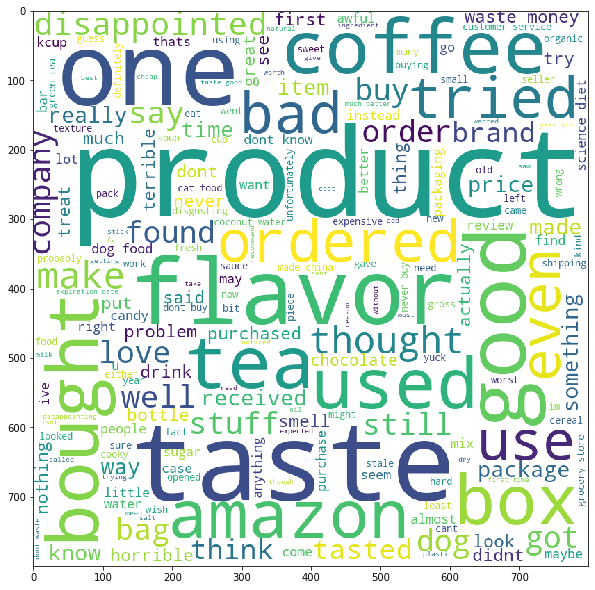

In [74]:
# Plotting word cloud for 1 star reviews

comment_words = '' 
# Iterating through the reviews
for val in reviews_1star['summary_text']: 
      
    # typecaste each review to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.tight_layout(pad = 0) 
  
plt.show() 

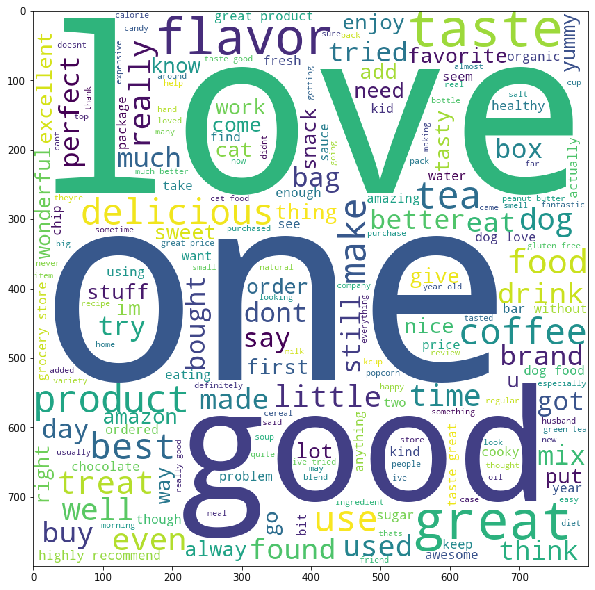

In [75]:
# Plotting word cloud for 1 star reviews

comment_words = '' 
# Iterate through the reviews 
for val in reviews_5star['summary_text']: 
      
    # Typecaste each val to string 
    val = str(val) 
  
    # Split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.tight_layout(pad = 0) 
  
plt.show() 